In [8]:
import pandas as pd
import numpy as np
%matplotlib inline 
import os,sys
import matplotlib.pyplot as plt
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/19_DOTA')

store={}
for filename in ['hero_data','train9','train1','test9','test1','sample_submission']:
    store[filename]=pd.read_csv('01.RawData/%s.csv'%filename)
    store[filename]['source']=filename
    
hero_data=pd.read_csv('01.RawData/hero_data.csv',index_col=['hero_id'])
# primary_attr - strength, agility, intelligence
# str > int, int> agi, agi > str
a=pd.read_csv('02.Submissions/3.NMF0.csv')
b=pd.read_csv('02.Submissions/4.UserHeroMean6.csv')
c=pd.merge(a,b,on=['id'])
c['kda_ratio']=c[['kda_ratio_x','kda_ratio_y']].mean(axis=1)
c[['id','kda_ratio']].to_csv('02.Submissions/5.Ensemble2.csv',index=False)


In [13]:
%run C:/Users/arpit.goel/Documents/Projects/Kaggle/19_DOTA/00.Scripts/2.NMF.py
pd.read_csv('02.Submissions/5.Ensemble3.csv').head()

Starting NMF decomposition with 2 latent features and 10 iterations.
Iteration 1: fit residual 473115.7781 total residual 227636.4088 test error 1332.47786922
Iteration 2: fit residual 153322.9388 total residual 117561.6129 test error 744.29322275
Iteration 3: fit residual 54248.1959 total residual 88081.0076 test error 580.916222484
Iteration 4: fit residual 19776.9836 total residual 81940.9218 test error 543.692152304
Iteration 5: fit residual 8286.4024 total residual 80229.0762 test error 532.632950436
Iteration 6: fit residual 4241.1737 total residual 79457.2654 test error 527.832809401
Iteration 7: fit residual 2771.9626 total residual 78994.9181 test error 525.149854789
Iteration 8: fit residual 2094.8766 total residual 78689.0502 test error 523.451326377
Iteration 9: fit residual 1666.2713 total residual 78479.3754 test error 522.303318418
Iteration 10: fit residual 1346.9888 total residual 78332.5133 test error 521.492609505


C:\Users\arpit.goel\AppData\Local\Continuum2\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,id,kda_ratio
0,3_53,2638.912253
1,4_17,3672.726474
2,9_51,2657.704213
3,10_54,4473.973376
4,15_74,4840.628276


In [11]:
import os
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/19_DOTA/FinalSubmission')
%run 3.NMF.py
pd.read_csv('2.Submissions/5.Ensemble3.csv').head()

Starting NMF decomposition with 2 latent features and 10 iterations.
Iteration 1: fit residual 473115.7781 total residual 227636.4088 test error 1332.47786922
Iteration 2: fit residual 153322.9388 total residual 117561.6129 test error 744.29322275
Iteration 3: fit residual 54248.1959 total residual 88081.0076 test error 580.916222484
Iteration 4: fit residual 19776.9836 total residual 81940.9218 test error 543.692152304
Iteration 5: fit residual 8286.4024 total residual 80229.0762 test error 532.632950436
Iteration 6: fit residual 4241.1737 total residual 79457.2654 test error 527.832809401
Iteration 7: fit residual 2771.9626 total residual 78994.9181 test error 525.149854789
Iteration 8: fit residual 2094.8766 total residual 78689.0502 test error 523.451326377
Iteration 9: fit residual 1666.2713 total residual 78479.3754 test error 522.303318418
Iteration 10: fit residual 1346.9888 total residual 78332.5133 test error 521.492609505


,id,kda_ratio
0,3_53,2638.912253
1,4_17,3672.726474
2,9_51,2657.704213
3,10_54,4473.973376
4,15_74,4840.628276


In [9]:
store['train9']['kda_ratio'].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    18846.000000
mean      3543.462003
std       1081.195070
min          0.000000
1%        1823.458875
5%        2184.228151
10%       2412.958233
25%       2841.265936
50%       3403.463637
75%       4073.493596
90%       4818.744783
95%       5347.830761
99%       6597.705824
max      38000.000000
Name: kda_ratio, dtype: float64

In [6]:
import pandas as pd
import os
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/19_DOTA')
a=pd.read_csv('02.Submissions/3.NMF0.csv')
b=pd.read_csv('02.Submissions/4.UserHeroMean6.csv')
c=pd.merge(a,b,on=['id'])
c['kda_ratio']=0.5*c['kda_ratio_x']+0.5*c['kda_ratio_y']
c[['id','kda_ratio']].to_csv('02.Submissions/5.Ensemble3.csv',index=False)


In [16]:
a=pd.concat([store['train9'],store['test9']])
a['kda_ratio']=np.clip(a['kda_ratio'],2000,6000)
user_mean1=a.groupby(['user_id'])['kda_ratio'].mean()
hero_mean1=a.groupby(['hero_id'])['kda_ratio'].mean()
user_mean2=a['kda_ratio']-a['hero_id'].map(hero_mean1)
user_mean2=user_mean2.groupby(a['user_id']).mean()
hero_mean2=a['kda_ratio']-a['user_id'].map(user_mean1)
hero_mean2=hero_mean2.groupby(a['hero_id']).mean()

b=store['train1'].copy()
b['F1']=b['user_id'].map(user_mean1)
b['F2']=b['user_id'].map(user_mean2)
b['F3']=b['hero_id'].map(hero_mean1)
b['F4']=b['hero_id'].map(hero_mean2)


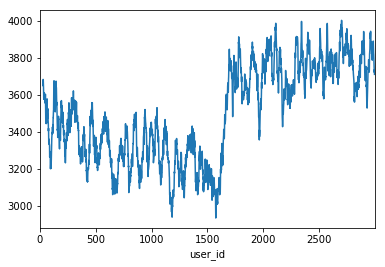

In [40]:
user_mean1.rolling(30).mean().plot()

In [70]:
a=pd.concat([store['train9'],store['train1']]).reset_index()
a['rank']=a.groupby(['user_id'])['num_games'].rank(ascending=False,method='first')
a['rank'].value_counts()

10.0    2094
7.0     2094
5.0     2094
9.0     2094
4.0     2094
8.0     2094
6.0     2094
3.0     2094
2.0     2094
1.0     2094
Name: rank, dtype: int64

In [71]:
a.groupby(['rank'])[['num_games','num_wins','kda_ratio']].mean()

,num_games,num_wins,kda_ratio
rank,,,
1.0,471.493314,275.582139,3698.458584
2.0,283.602674,161.312798,3585.499948
3.0,201.698663,113.665712,3594.958144
4.0,172.698185,96.721108,3561.254781
5.0,151.693410,84.350525,3557.476784
6.0,137.233524,76.303247,3520.116508
7.0,124.798472,68.861032,3482.421912
8.0,115.184336,63.659981,3471.755289
9.0,104.901624,57.905922,3480.390687


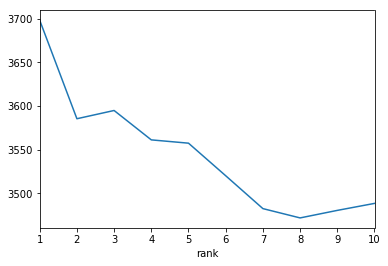

In [103]:
a.groupby(['rank'])['kda_ratio'].mean().plot()

(2000, 5500)

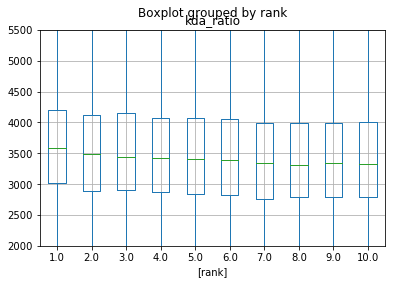

In [76]:
a[['rank','kda_ratio']].boxplot(by='rank')
plt.ylim(2000,5500)

In [128]:
def nmf_rank(mat_t,mat_v,latent_features, max_iter=100, error_limit=1e-6, fit_error_limit=1e-6):
    X=mat_t.fillna(0).values
    test=mat_v.copy()
    test['index']=test['user_id'].astype(str)+'_'+test['rank'].astype(str)
    # Define index for prediction
    pred_index=mat_t.fillna(0).stack().to_frame('kda_ratio').reset_index()
    pred_index=pred_index['user_id'].astype(str)+'_'+pred_index['rank'].astype(str)

    eps = 1e-5
    print 'Starting NMF decomposition with {} latent features and {} iterations.'.format(latent_features, max_iter)
    # mask
    mask = np.sign(X)

    # initial matrices. A is random [0,1] and Y is A\X.
    rows, columns = X.shape
    np.random.seed(1234)
    A = np.random.rand(rows, latent_features)
    A = np.maximum(A, eps)

    Y = linalg.lstsq(A, X)[0]
    Y = np.maximum(Y, eps)

    masked_X = mask * X
    X_est_prev = dot(A, Y)
    for i in range(1, max_iter + 1):
        # ===== updates =====
        # Matlab: A=A.*(((W.*X)*Y')./((W.*(A*Y))*Y'));
        top = dot(masked_X, Y.T)
        bottom = (dot((mask * dot(A, Y)), Y.T)) + eps
        A *= top / bottom

        A = np.maximum(A, eps)
        # print 'A',  np.round(A, 2)

        # Matlab: Y=Y.*((A'*(W.*X))./(A'*(W.*(A*Y))));
        top = dot(A.T, masked_X)
        bottom = dot(A.T, mask * dot(A, Y)) + eps
        Y *= top / bottom
        Y = np.maximum(Y, eps)
        # print 'Y', np.round(Y, 2)


        # ==== evaluation ====
        if i % 1 == 0 or i == 1 or i == max_iter:
            print 'Iteration {}:'.format(i),
            X_est = dot(A, Y)
            err = mask * (X_est_prev - X_est)
            fit_residual = np.sqrt(np.sum(err ** 2))
            X_est_prev = X_est

            curRes = linalg.norm(mask * (X - X_est), ord='fro')
            print 'fit residual', np.round(fit_residual, 4),
            print 'total residual', np.round(curRes, 4),
            if curRes < error_limit or fit_residual < fit_error_limit:
                break
            # Validation error to find optimal number of iterations.
            pred=pd.DataFrame(A.dot(Y)).stack().to_frame('kda_ratio')
            pred.index=pred_index
            test['prediction']=test['index'].map(pred['kda_ratio'])
            test['error']=np.square(test['prediction']-test['kda_ratio'])
            print 'test error', np.sqrt(test['error'].mean())
    return A,Y

a=pd.concat([store['train9'],store['train1'],store['test9'],store['test1']]).reset_index()
a['rank']=a.groupby(['user_id'])['num_games'].rank(ascending=False,method='first')
a['sample']=np.random.rand(len(a))
train=a[((a['source']=='train9')|(a['source']=='test9'))]
val=a[a['source']=='train1']
train.set_index(['user_id','rank'],inplace=True)
mat_train=train['kda_ratio'].unstack()
mat_val=val
print mat_train.T.iloc[:,:10]
mat_train.T.iloc[:,:10].interpolate()


user_id           1            2            3            4            5   \
rank                                                                       
1.0      3743.699732  3061.059634  3418.470419  3231.446818  3899.408284   
2.0      4009.021513  2712.168005          NaN  3536.332180  3785.130719   
3.0      5094.621514  2664.801343  2522.639069  2381.211709  5032.214765   
4.0              NaN          NaN  2793.255132  3631.721645          NaN   
5.0      4619.212963  3007.831120  3493.495230  3143.617021  4661.174047   
6.0      2871.627907  2615.625000  3586.402266  2601.437700  3817.801047   
7.0      3533.333333  3032.215648  2996.850394  3604.414262  3698.933552   
8.0      3635.778636  3035.989717  2605.648536  3030.349014  2917.832168   
9.0      3732.919255  2974.182444  3234.042553  3250.320102  4221.565731   
10.0     3477.341390  2617.262424  3218.470705          NaN  5712.328767   

user_id           6            7            8            9            10  
rank        

user_id,1,2,3,4,5,6,7,8,9,10
rank,,,,,,,,,,
1.0,3743.699732,3061.059634,3418.470419,3231.446818,3899.408284,3802.301963,3181.303633,3830.321521,3419.303798,4068.393782
2.0,4009.021513,2712.168005,2970.554744,3536.332180,3785.130719,3383.678441,2126.570711,3680.978961,2982.718894,4046.215673
3.0,5094.621514,2664.801343,2522.639069,2381.211709,5032.214765,4087.789306,3716.117469,3908.404155,3815.043157,3592.558984
4.0,4856.917238,2836.316232,2793.255132,3631.721645,4846.694406,4113.855514,3937.771690,3744.431962,2996.555683,3859.456333
5.0,4619.212963,3007.831120,3493.495230,3143.617021,4661.174047,4139.921722,4159.425912,3580.459770,2506.437768,3720.576461
6.0,2871.627907,2615.625000,3586.402266,2601.437700,3817.801047,3730.837790,2431.875792,3149.470900,2221.945137,3094.444444
7.0,3533.333333,3032.215648,2996.850394,3604.414262,3698.933552,4405.630866,3247.016706,3585.211268,3097.039474,3687.555163
8.0,3635.778636,3035.989717,2605.648536,3030.349014,2917.832168,4320.388349,2164.794008,4264.604811,3396.739130,5584.795322
9.0,3732.919255,2974.182444,3234.042553,3250.320102,4221.565731,3828.202582,2660.496614,3721.367521,3083.359819,4465.886940


In [140]:
a=pd.concat([store['train9'],store['train1'],store['test9'],store['test1']]).reset_index()
a['rank']=a.groupby(['user_id'])['num_games'].rank(ascending=False,method='first')
a.set_index(['user_id','rank'],inplace=True)
mat_train=a['kda_ratio'].unstack()
mat_train=mat_train.T.interpolate().T
mat_train.iloc[:,0]=mat_train.iloc[:,0].fillna(mat_train.iloc[:,1])
a['pred']=mat_train.stack()


In [117]:
b=pd.concat([store['train9'],store['train1'],store['test9'],store['test1']]).reset_index()
b['rank']=b.groupby(['user_id'])['num_games'].rank(ascending=False,method='first')
pd.crosstab(b['rank'],b['source'])


source,test1,test9,train1,train9
rank,,,,
1.0,81,817,0,2094
2.0,94,804,0,2094
3.0,76,822,0,2094
4.0,107,791,1537,557
5.0,92,806,107,1987
6.0,98,800,409,1685
7.0,100,798,37,2057
8.0,78,820,2,2092
9.0,86,812,1,2093


In [142]:
a=pd.concat([store['train9'],store['train1'],store['test9'],store['test1']]).reset_index()
a['rank']=a.groupby(['user_id'])['num_games'].rank(ascending=False,method='first')
a.set_index(['user_id','rank'],inplace=True)
mat_train=a['kda_ratio'].unstack()
mat_train.iloc[:,9]=mat_train.iloc[:,9].fillna(mat_train.min(axis=1))
mat_train.iloc[:,0]=mat_train.iloc[:,0].fillna(mat_train.max(axis=1))
mat_train=mat_train.T.interpolate().T
a['pred']=mat_train.stack()
a=a[a['source']=='test1']
a['kda_ratio']=a['pred']
a[['id','kda_ratio']].to_csv('02.Submissions/6.FavouriteHeroInterpolation.csv',index=False)



In [144]:
import pandas as pd
import numpy as np
from scipy import linalg
from numpy import dot
import os,sys

store={}
for filename in ['hero_data','train9','train1','test9','test1','sample_submission']:
    store[filename]=pd.read_csv('01.RawData/%s.csv'%filename)
    
a=pd.concat([store['train9'],store['test9']])
a['kda_ratio']=np.clip(a['kda_ratio'],2000,5500)
user_mean1=a.groupby(['user_id'])['kda_ratio'].mean()
hero_mean1=a.groupby(['hero_id'])['kda_ratio'].mean()
user_mean2=a['kda_ratio']-a['hero_id'].map(hero_mean1)
user_mean2=user_mean2.groupby(a['user_id']).mean()
hero_mean2=a['kda_ratio']-a['user_id'].map(user_mean1)
hero_mean2=hero_mean2.groupby(a['hero_id']).mean()

c=store['test1'].copy()
c['F1']=c['user_id'].map(user_mean1)
c['F2']=c['user_id'].map(user_mean2)
c['F3']=c['hero_id'].map(hero_mean1)
c['F4']=c['hero_id'].map(hero_mean2)
c['kda_ratio']=c['F1']+c['F4']
c['kda_ratio']=949.4+0.2383*c['F1']+0.8295*c['F2']+0.4924*c['F3']+0.6333*c['F4']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean7.csv',index=False)

In [18]:
import statsmodels.api as sm
Y = b['kda_ratio']
X = b[['F1','F2','F3','F4']]
model = sm.OLS(Y,sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kda_ratio   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1076.
Date:                Sat, 27 Jan 2018   Prob (F-statistic):               0.00
Time:                        21:08:27   Log-Likelihood:                -16279.
No. Observations:                2094   AIC:                         3.257e+04
Df Residuals:                    2089   BIC:                         3.260e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        949.4109    265.174      3.580      0.000     429.379    1469.443
F1             0.2383      0.051      4.714      0.000       0.139       0.337
F2             0.8295      0.058     14.398      0.000       0.717       0.943
F3             0.4924      0.081      6.098      0.000       0.334       0.651
F4             0.6333      0.109      5.797      0.000       0.419       0.848
==============================================================================
Omnibus:                     2333.848   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912912.808
Skew:                           4.990   Prob(JB):                         0.00
Kurtosis:                     104.802   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
c=store['test1'].copy()
c['F1']=c['user_id'].map(user_mean1)
c['F2']=c['user_id'].map(user_mean2)
c['F3']=c['hero_id'].map(hero_mean1)
c['F4']=c['hero_id'].map(hero_mean2)
c['kda_ratio']=c['F1']+c['F4']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean1.csv',index=False)
c['kda_ratio']=316+0.911*c['F1']+1.189*c['F4']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean2.csv',index=False)
c['kda_ratio']=16.73+0.904*c['F1']+0.0917*c['F3']+1.0678*c['F4']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean3.csv',index=False)
c['kda_ratio']=949.4+0.2383*c['F1']+0.8295*c['F2']+0.4924*c['F3']+0.6333*c['F4']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean4.csv',index=False)
c['kda_ratio']=c['F2']+c['F3']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean5.csv',index=False)
c['kda_ratio']=(c['F1']+c['F2']+c['F3']+c['F4'])/2
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean6.csv',index=False)


In [27]:
a=pd.concat([store['train9'],store['test9']])
a['kda_ratio'].describe(percentiles=[0.01,0.05,0.95,0.99])

count    26928.000000
mean      3529.854825
std       1053.667018
min          0.000000
1%        1811.068362
5%        2178.184218
50%       3394.613468
95%       5311.831719
99%       6546.953379
max      38000.000000
Name: kda_ratio, dtype: float64

In [28]:
b=store['train1'].copy()
b['F1']=b['user_id'].map(user_mean1)
b['F2']=b['user_id'].map(user_mean2)
b['F3']=b['hero_id'].map(hero_mean1)
b['F4']=b['hero_id'].map(hero_mean2)

c=store['test1'].copy()
c['F1']=c['user_id'].map(user_mean1)
c['F2']=c['user_id'].map(user_mean2)
c['F3']=c['hero_id'].map(hero_mean1)
c['F4']=c['hero_id'].map(hero_mean2)
c['kda_ratio']=c['F1']+c['F4']
c['kda_ratio']=949.4+0.2383*c['F1']+0.8295*c['F2']+0.4924*c['F3']+0.6333*c['F4']
c[['id','kda_ratio']].to_csv('02.Submissions/4.UserHeroMean4.csv',index=False)


In [30]:
c

,user_id,hero_id,id,num_games,F1,F2,F3,F4,kda_ratio
0,3,53,3_53,278,3096.586034,-274.782076,2876.760278,-515.880171,2549.194569
1,4,17,4_17,180,3156.761161,-19.222409,3924.633722,208.272016,3750.099509
2,9,51,9_51,70,3022.862616,-525.656959,3213.593200,-194.423213,2692.960785
3,10,54,10_54,189,4013.320345,38.463657,4308.881899,629.149688,4457.813786
4,15,74,15_74,263,4752.035193,918.979506,3863.943626,224.798337,4889.074115
5,19,38,19_38,426,3423.325918,92.953548,2953.661732,-500.916742,2979.435998
6,21,93,21_93,158,3491.791800,277.875633,4002.923091,316.628064,4183.551706
7,31,80,31_80,196,3543.617012,-376.695960,3847.181273,347.388741,3595.727984
8,34,62,34_62,111,2712.871487,-194.030094,3116.500926,-161.166603,2867.427558
9,35,74,35_74,157,3503.659010,166.824279,3863.943626,224.798337,3967.673310


In [25]:
a=pd.read_csv('02.Submissions/3.NMF0.csv')
b=pd.read_csv('02.Submissions/4.UserHeroMean4.csv')
c=pd.merge(a,b,on=['id'])
c['kda_ratio']=c[['kda_ratio_x','kda_ratio_y']].mean(axis=1)
c[['id','kda_ratio']].to_csv('02.Submissions/5.Ensemble1.csv',index=False)

In [2]:
hero_data=pd.read_csv('01.RawData/hero_data.csv',index_col=['hero_id'])
for k,v in hero_data[hero_data.columns[3:]].apply(lambda x: x.unique().shape[0]).to_dict().items():
    if v>1:
        hero_data['FEAT_%s'%k]=hero_data['%s'%k]

for role in set([y for x in hero_data['roles'].str.split(':') for y in x]):
    hero_data['FEAT_role_%s'%role]=hero_data['roles'].map(lambda x: role in x).astype(np.int8)
    
cat_features=pd.get_dummies(hero_data[['primary_attr','attack_type']],prefix='FEAT')
hero_features=pd.concat([hero_data,cat_features],axis=1)
hero_features.columns=hero_features.columns.str.upper()
hero_features=hero_features.iloc[:,hero_features.columns.str[:4]=='FEAT']



In [3]:
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/19_DOTA')
means=store['test9'].groupby(['user_id'])['kda_ratio'].mean()
submission=store['test1'].copy()
submission['kda_ratio']=submission['user_id'].map(means)
submission[['id','kda_ratio']].to_csv('02.Submissions/2.UserMeans1.csv',index=False)
submission['kda_ratio']=submission['user_id'].map(means)
submission['kda_ratio']=submission['kda_ratio']-submission['kda_ratio'].mean()+3545.967206
submission[['id','kda_ratio']].to_csv('02.Submissions/2.UserMeans2.csv',index=False)
submission['kda_ratio']=submission['user_id'].map(means)
submission['kda_ratio']=(submission['kda_ratio']-submission['kda_ratio'].mean())/submission['kda_ratio'].std()
submission['kda_ratio']=submission['kda_ratio']*946.1+3545.967206
submission[['id','kda_ratio']].to_csv('02.Submissions/2.UserMeans3.csv',index=False)

In [4]:
import numpy as np
from scipy import linalg
from numpy import dot

def nmf(mat, latent_features, max_iter=100, error_limit=1e-6, fit_error_limit=1e-6):
    """
    Decompose X to A*Y
    """
    X=mat.fillna(0).values
    test=store['train1']
    pred_index=mat.fillna(0).stack().to_frame('kda_ratio').reset_index()
    pred_index=pred_index['user_id'].astype(str)+'_'+pred_index['hero_id'].astype(str)

    eps = 1e-5
    print 'Starting NMF decomposition with {} latent features and {} iterations.'.format(latent_features, max_iter)
    # mask
    mask = np.sign(X)

    # initial matrices. A is random [0,1] and Y is A\X.
    rows, columns = X.shape
    np.random.seed(1234)
    A = np.random.rand(rows, latent_features)
    A = np.maximum(A, eps)

    Y = linalg.lstsq(A, X)[0]
    Y = np.maximum(Y, eps)

    masked_X = mask * X
    X_est_prev = dot(A, Y)
    for i in range(1, max_iter + 1):
        # ===== updates =====
        # Matlab: A=A.*(((W.*X)*Y')./((W.*(A*Y))*Y'));
        top = dot(masked_X, Y.T)
        bottom = (dot((mask * dot(A, Y)), Y.T)) + eps
        A *= top / bottom

        A = np.maximum(A, eps)
        # print 'A',  np.round(A, 2)

        # Matlab: Y=Y.*((A'*(W.*X))./(A'*(W.*(A*Y))));
        top = dot(A.T, masked_X)
        bottom = dot(A.T, mask * dot(A, Y)) + eps
        Y *= top / bottom
        Y = np.maximum(Y, eps)
        # print 'Y', np.round(Y, 2)


        # ==== evaluation ====
        if i % 1 == 0 or i == 1 or i == max_iter:
            print 'Iteration {}:'.format(i),
            X_est = dot(A, Y)
            err = mask * (X_est_prev - X_est)
            fit_residual = np.sqrt(np.sum(err ** 2))
            X_est_prev = X_est

            curRes = linalg.norm(mask * (X - X_est), ord='fro')
            print 'fit residual', np.round(fit_residual, 4),
            print 'total residual', np.round(curRes, 4),
            if curRes < error_limit or fit_residual < fit_error_limit:
                break
            pred=pd.DataFrame(A.dot(Y)).stack().to_frame('kda_ratio')
            pred.index=pred_index
            test['prediction']=test['id'].map(pred['kda_ratio'])
            test['error']=np.square(test['prediction']-test['kda_ratio'])
            print 'test error', np.sqrt(test['error'].mean())
    return A,Y


In [149]:
mat=pd.concat([store['test9'],store['train9']]).groupby(['user_id','hero_id'])
mat=np.clip(mat['kda_ratio'].mean(),2000,5500).unstack()
for i in range(2):
    A,Y=nmf(mat,i+2,max_iter=25)
    pred=pd.DataFrame(A.dot(Y),index=mat.index,columns=mat.columns).stack().to_frame('pred').reset_index()
    pred.index=pred['user_id'].astype(str)+'_'+pred['hero_id'].astype(str)
    store['train1']['pred%d'%i]=store['train1']['id'].map(pred['pred'])


Starting NMF decomposition with 2 latent features and 25 iterations.
Iteration 1: fit residual 456811.2113 total residual 223276.058 test error 1692.524535
Iteration 2: fit residual 148981.8585 total residual 114529.174 test error 871.127751498
Iteration 3: fit residual 55115.5419 total residual 83187.0263 test error 659.00594897
Iteration 4: fit residual 20008.6475 total residual 76611.4387 test error 611.945444024
Iteration 5: fit residual 8313.5153 total residual 74824.7685 test error 598.146509359
Iteration 6: fit residual 4192.0583 total residual 74038.6648 test error 592.177180664
Iteration 7: fit residual 2703.1239 total residual 73570.677 test error 588.848378559
Iteration 8: fit residual 2033.9213 total residual 73259.8849 test error 586.758482721
Iteration 9: fit residual 1619.6634 total residual 73045.234 test error 585.371968657
Iteration 10: fit residual 1313.8678 total residual 72893.5785 test error 584.423484055
Iteration 11: fit residual 1074.6747 total residual 72784.1

In [6]:
from itertools import product
def get_error(a,b):
    return np.sqrt(np.square(a-b).mean())
for i in range(4):
    print i,get_error(store['train1']['pred%d'%i],store['train1']['kda_ratio'])
for i,j in product(range(4),range(4)):
    if i>j:
        print i,j,get_error(store['train1'][['pred%d'%i,'pred%d'%j]].mean(axis=1),store['train1']['kda_ratio'])
for i,j,k in product(range(4),range(4),range(4)):
    if i>j and j>k:
        print i,j,k,get_error(store['train1'][['pred%d'%i,'pred%d'%j,'pred%d'%k]].mean(axis=1),store['train1']['kda_ratio'])

0 575.914759144
1 607.924324444
2 635.343416155
3 663.334123659
1 0 582.940200908
2 0 587.455758761
2 1 598.851672867
3 0 593.125426024
3 1 603.972665005
3 2 608.166257754
2 1 0 583.978351885
3 1 0 585.409463724
3 2 0 586.109747062
3 2 1 592.531725606


In [7]:
%run C:/Users/arpit.goel/Documents/Projects/Kaggle/19_DOTA/00.Scripts/2.NMF.py

Starting NMF decomposition with 2 latent features and 10 iterations.
Iteration 1: fit residual 470286.1672 total residual 225603.5008 test error 1337.72874494
Iteration 2: fit residual 152512.4995 total residual 115185.8289 test error 753.600777926
Iteration 3: fit residual 53949.0394 total residual 85235.5665 test error 592.877928507
Iteration 4: fit residual 19679.3901 total residual 78936.2079 test error 556.298139357
Iteration 5: fit residual 8256.0848 total residual 77175.7044 test error 545.413922397
Iteration 6: fit residual 4230.302 total residual 76382.9681 test error 540.706359849
Iteration 7: fit residual 2766.4398 total residual 75908.9394 test error 538.091089509
Iteration 8: fit residual 2091.6433 total residual 75595.9792 test error 536.444188865
Iteration 9: fit residual 1664.5297 total residual 75382.0293 test error 535.335000777
Iteration 10: fit residual 1346.2696 total residual 75232.7427 test error 534.552988517
Starting NMF decomposition with 3 latent features and

In [2]:
a=pd.read_csv('02.Submissions/3.NMF0.csv')
b=pd.read_csv('02.Submissions/4.UserHeroMean8.csv')
c=pd.merge(a,b,on=['id'])
c['kda_ratio']=c[['kda_ratio_x','kda_ratio_y']].mean(axis=1)
c[['id','kda_ratio']].to_csv('02.Submissions/5.Ensemble3.csv',index=False)


In [9]:
a=pd.read_csv('02.Submissions/3.NMF0.csv')
b=pd.read_csv('02.Submissions/4.UserHeroMean8.csv')
c=pd.merge(a,b,on=['id'])
c['kda_ratio']=c[['kda_ratio_x','kda_ratio_y']].mean(axis=1)
c[['id','kda_ratio']].to_csv('02.Submissions/5.Ensemble4.csv',index=False)



In [19]:
submission[['id','kda_ratio']].to_csv('02.Submissions/3.NMF_Norm.csv',index=False) 

In [21]:
submission[['id','kda_ratio']].describe(percentiles=[0.01])

,kda_ratio
count,898.000000
mean,3517.481091
std,853.527710
min,1620.503508
1%,1946.309025
50%,3480.334208
max,6688.467272


In [9]:
hero_features1=hero_features.join(pd.DataFrame(Y.T,index=mat.columns,columns=['tgt1','tgt2']))
hero_features1.corr().to_clipboard()

In [10]:
hero_features

,FEAT_INTELLIGENCE_GAIN,FEAT_STRENGTH_GAIN,FEAT_BASE_HEALTH_REGEN,FEAT_BASE_ARMOR,FEAT_PROJECTILE_SPEED,FEAT_MOVE_SPEED,FEAT_AGILITY_GAIN,FEAT_BASE_STRENGTH,FEAT_ATTACK_RATE,FEAT_BASE_ATTACK_MAX,...,FEAT_ROLE_JUNGLER,FEAT_ROLE_INITIATOR,FEAT_ROLE_ESCAPE,FEAT_ROLE_CARRY,FEAT_ROLE_SUPPORT,FEAT_AGI,FEAT_INT,FEAT_STR,FEAT_MELEE,FEAT_RANGED
hero_id,,,,,,,,,,,,,,,,,,,,,
1,1.80,1.30,1.50,-1.0,0,310,2.8,22,1.45,31,...,0,0,1,1,0,1,0,0,1,0
2,1.60,2.80,4.25,-1.0,900,290,2.2,25,1.70,28,...,1,1,0,0,0,0,0,1,1,0
3,2.40,2.40,1.50,1.0,900,310,2.4,23,1.70,43,...,0,0,0,0,1,0,1,0,0,1
4,1.70,2.70,1.50,0.0,900,285,3.0,23,1.70,39,...,1,1,0,1,0,1,0,0,1,0
5,2.90,2.00,1.50,-1.0,900,275,1.6,16,1.70,25,...,1,0,0,0,1,0,1,0,0,1
6,1.40,1.90,1.50,-3.0,1250,285,1.9,17,1.70,25,...,0,0,0,1,0,1,0,0,0,1
7,1.80,3.20,2.00,1.0,0,310,1.4,22,1.70,34,...,0,1,0,0,1,0,0,1,1,0
8,1.40,2.20,2.00,0.0,0,295,2.4,20,1.40,26,...,0,0,1,1,0,1,0,0,1,0
9,1.65,2.15,1.50,-1.0,900,295,3.2,17,1.70,32,...,0,0,1,1,1,1,0,0,0,1


In [11]:
    pred=pd.DataFrame(A.dot(Y),index=mat.index,columns=mat.columns).stack().to_frame('pred').reset_index()
    pred.index=pred['user_id'].astype(str)+'_'+pred['hero_id'].astype(str)
    store['train1']['pred5']=store['train1']['id'].map(pred['pred'])
    get_error(store['train1']['pred5'],store['train1']['kda_ratio'])

521.4926095047407

In [12]:
np.corrcoef(A[:,0],store['train0'].groupby(['user_id'])['num_games'].sum())

KeyError: 'train0'

(0, 8000)

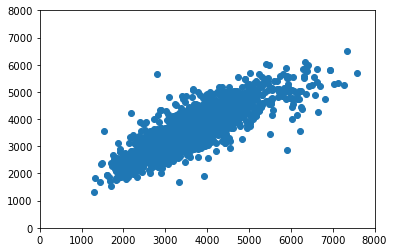

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x=store['train1']['kda_ratio'],y=store['train1']['pred0'])
plt.xlim(0,8000)
plt.ylim(0,8000)

In [15]:
from scipy.stats import linregress
a=store['train1'].copy()
a['kda_ratio']=np.clip(a['kda_ratio'],2000,6000)
a['pred0']=np.clip(a['pred0'],2000,6000)
linregress(store['train1']['pred0'],store['train1']['kda_ratio'])

LinregressResult(slope=1.030990659246338, intercept=-96.207112422082446, rvalue=0.82070291591443523, pvalue=0.0, stderr=0.015692569879867557)

In [50]:
store['test1'].head()

,user_id,hero_id,id,num_games,pred0,pred1,pred2,pred3
0,3,53,3_53,278,2714.745748,2491.442928,2577.485988,2590.951414
1,4,17,4_17,180,3681.769920,3811.926478,3831.033872,4025.870944
2,9,51,9_51,70,2303.936130,2581.668075,2314.230407,2698.184650
3,10,54,10_54,189,4373.194268,4588.099412,4146.237169,4378.477152
4,15,74,15_74,263,4761.200975,4608.780979,4847.935308,4840.321399


In [434]:
for i in range(4):
    submission=store['test1'].copy()
    submission['kda_ratio']=submission['pred%d'%i]
    submission[['id','kda_ratio']].to_csv('02.Submissions/3.NMF%d.csv'%i,index=False)


In [349]:
print store['train9'].shape
print store['train9'][['user_id','hero_id']].drop_duplicates().shape

(18846, 6)
(18846, 6)


In [439]:
np.sqrt(np.square(submission['pred0']-submission['pred2']).mean())

276.74917192347897

In [449]:
mat=pd.concat([store['test9'],store['train9']]).groupby(['user_id','hero_id'])
mat=mat['kda_ratio'].mean().unstack()

ii_corr=mat.corr().stack()
ii_corr.index.names=['hero_id1','hero_id2']


In [466]:
pred=pd.merge(store['train1'][['user_id','hero_id','id','kda_ratio']],ii_corr.to_frame('corr').reset_index(),left_on=['hero_id'],right_on=['hero_id1'])
pred=pd.merge(pred,store['train9'][['user_id','hero_id','kda_ratio']],left_on=['user_id','hero_id2'],right_on=['user_id','hero_id'])
pred['wgt']=pred.groupby(['user_id'])['corr'].transform(np.sum)
pred['kda_ratio']=pred['corr']*pred['kda_ratio_y']/pred['wgt']
pred=pred.groupby(['user_id','hero_id1','id','kda_ratio_x'])['kda_ratio'].sum().to_frame('pred').reset_index()
np.sqrt(np.square(pred['kda_ratio_x']-pred['pred']).mean())

822.99026397440844

In [489]:
cosine_dist=pd.DataFrame(cosine_dist,columns=['hero_id1','hero_id2','corr','data_points'])
pred=pd.merge(store['train1'][['user_id','hero_id','id','kda_ratio']],cosine_dist,left_on=['hero_id'],right_on=['hero_id1'])
pred=pd.merge(pred,store['train9'][['user_id','hero_id','kda_ratio']],left_on=['user_id','hero_id2'],right_on=['user_id','hero_id'])
pred['wgt']=pred.groupby(['user_id'])['corr'].transform(np.sum)
pred['kda_ratio']=pred['corr']*pred['kda_ratio_y']/pred['wgt']
pred=pred.groupby(['user_id','hero_id1','id','kda_ratio_x'])['kda_ratio'].sum().to_frame('pred').reset_index()
#np.sqrt(np.square(pred['kda_ratio_x']-pred['pred']).mean())
pred

,user_id,hero_id1,id,kda_ratio_x,pred
0,1,41,1_41,3731.707317,3980.707805
1,2,17,2_17,2922.058381,2842.068282
2,5,106,5_106,5116.682739,4325.258309
3,6,65,6_65,4131.553861,3914.425847
4,7,69,7_69,2474.469306,1634.082951
5,8,39,8_39,4632.573290,3717.671051
6,11,7,11_7,2990.055249,2611.398944
7,12,62,12_62,3390.995261,3338.777616
8,13,62,13_62,3423.442450,3986.450266
9,14,32,14_32,3482.988166,3828.587374


In [485]:
pd.DataFrame(cosine_dist,columns=['hero_id1','hero_id2','corr','data_points'])

,hero_id1,hero_id2,corr,data_points
0,2,1,0.068293,39
1,1,2,0.068293,39
2,3,1,0.533011,7
3,1,3,0.533011,7
4,3,2,0.965296,6
5,2,3,0.965296,6
6,4,1,0.707761,60
7,1,4,0.707761,60
8,4,2,0.445906,24
9,2,4,0.445906,24


In [484]:
from sklearn.metrics.pairwise import cosine_similarity
mat=pd.concat([store['test9'],store['train9']]).groupby(['user_id','hero_id'])
mat=mat['kda_ratio'].mean()
mat=(mat-mat.mean())/mat.std()
mat=mat.unstack()
cosine_dist=[]
for i,j in product(mat.columns,mat.columns):
    if i>j:
        t1=mat[[i,j]].dropna()
        if t1.shape[0]>0:
            t2=cosine_similarity(mat[[i,j]].dropna().T)[0,1]
            cosine_dist.append([i,j,t2,t1.shape[0]])
            cosine_dist.append([j,i,t2,t1.shape[0]])

In [483]:
mat


hero_id,1,2,3,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,119,120
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,-0.620775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.772488,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.059276,NaN,NaN,-0.695340,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.102394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.434852,NaN,NaN,NaN,NaN,NaN,NaN,0.279434,NaN,2.081927,...,NaN,NaN,0.663584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:
np.sqrt(np.square(3545.967206-pred['pred']).mean())

800.86888331164482

In [105]:
url = 'https://www.nseindia.com/content/nsccl/fao_participant_oi_25012018.csv'  
urllib.urlretrieve(url, 'fao_participant_oi_25012018.csv')  

('fao_participant_oi_25012018.csv',
 <httplib.HTTPMessage instance at 0x000000000FE7C3C8>)

In [136]:
import requests
import pandas as pd
from datetime import date
import urllib

os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData')

def get_files(dates):
    for date in dates:
        date1=date.strftime('%d%m%Y') 
        date2=date.strftime('%Y%m%d') 
        url = 'https://www.nseindia.com/content/nsccl/fao_participant_oi_%s.csv'%date1
        r = requests.get(url)
        with open('%s.csv'%date2,'wb') as f:
            f.write(r.text)

def get_master_file(dates):
    output=[]
    for date in dates:
        date1=date.strftime('%d%m%Y') 
        date2=date.strftime('%Y%m%d') 
        df=pd.read_csv('%s.csv'%date2,skiprows=1,index_col=0)
        df['date']=date
        output.append(df)
    return pd.concat(output)
        
    
dates=pd.date_range(start=date(2017,1,1),end=date(2017,1,5))
get_master_file(dates)


,inaccurate,or the server has been instructed not to let you have it.,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Call Short,Option Index Put Long,Option Index Put Short,Option Stock Call Long,Option Stock Call Short,Option Stock Put Long,Option Stock Put Short,Total Long Contracts,Total Short Contracts,date
Client,NaN,NaN,140483.0,179416.0,672909.0,179836.0,416506.0,506969.0,450784.0,657656.0,86242.0,70820.0,48144.0,45659.0,1815068.0,1640356.0,2017-01-02
DII,NaN,NaN,22605.0,36411.0,8005.0,416965.0,145470.0,0.0,3329.0,0.0,72.0,0.0,0.0,0.0,179481.0,453376.0,2017-01-02
FII,NaN,NaN,109357.0,53167.0,361000.0,488750.0,189164.0,191780.0,329766.0,73753.0,8239.0,5960.0,6249.0,5704.0,1003775.0,819114.0,2017-01-02
Pro,NaN,NaN,28781.0,32232.0,88748.0,45111.0,170701.0,223092.0,172526.0,224995.0,17692.0,35465.0,18061.0,21091.0,496509.0,581986.0,2017-01-02
TOTAL,NaN,NaN,301226.0,301226.0,1130662.0,1130662.0,921841.0,921841.0,956405.0,956404.0,112245.0,112245.0,72454.0,72454.0,3494833.0,3494832.0,2017-01-02
Client,NaN,NaN,140566.0,175513.0,670470.0,188810.0,437737.0,538959.0,484247.0,691827.0,96598.0,79960.0,55709.0,52209.0,1885327.0,1727278.0,2017-01-03
DII,NaN,NaN,21620.0,36806.0,8346.0,412966.0,145470.0,0.0,3329.0,0.0,72.0,0.0,0.0,0.0,178837.0,449772.0,2017-01-03
FII,NaN,NaN,108661.0,52823.0,366599.0,484879.0,202192.0,196566.0,348384.0,77809.0,10236.0,8212.0,7514.0,7011.0,1043586.0,827300.0,2017-01-03
Pro,NaN,NaN,31326.0,37031.0,90699.0,49459.0,169742.0,219616.0,168329.0,234652.0,20248.0,38982.0,19386.0,23389.0,499730.0,603129.0,2017-01-03
TOTAL,NaN,NaN,302173.0,302173.0,1136114.0,1136114.0,955141.0,955141.0,1004289.0,1004288.0,127154.0,127154.0,82609.0,82609.0,3607480.0,3607479.0,2017-01-03


In [151]:
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/1.OpenInterest')
%run scrape_clientwise_open_interest.py

In [171]:
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions')
nifty=pd.read_csv('01.RawData/NiftyHistorical.csv',index_col='Date',parse_dates=['Date'])
oi=pd.read_csv('03.HistoricalData/1.OpenInterest/master.csv',index_col=['date','Client Type'],parse_dates=['date'])

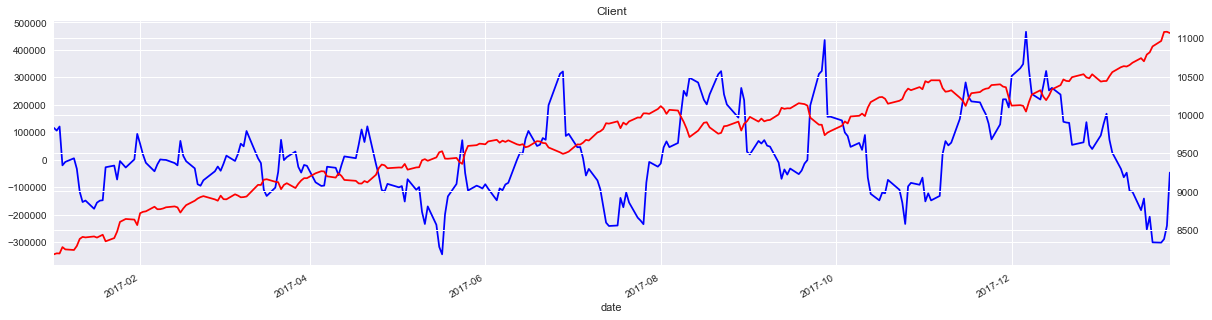

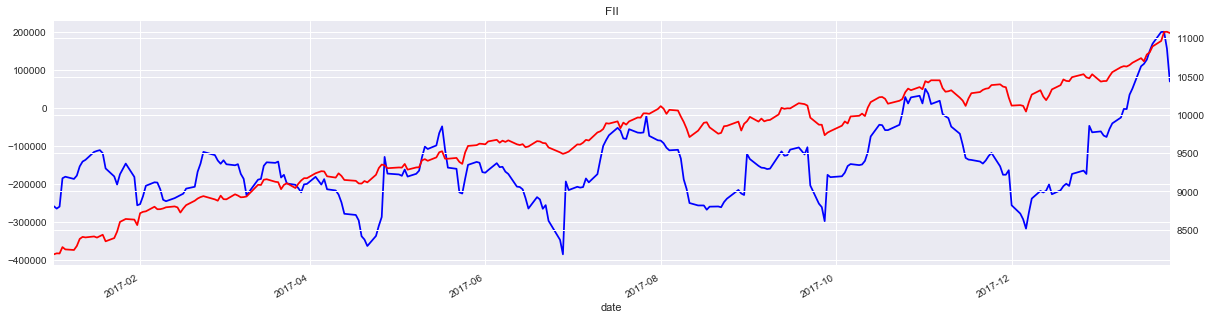

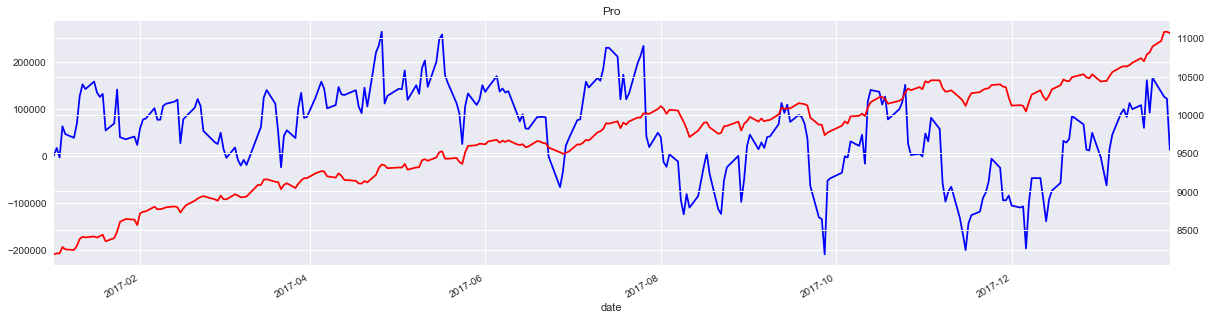

In [291]:
oi['oi_call']=oi['Option Index Call Long']-oi['Option Index Call Short']
oi['oi_put']=oi['Option Index Put Short']-oi['Option Index Put Long']
oi['oi']=oi['oi_call']+oi['oi_put']
oi1=oi['oi'].unstack().iloc[:,[0,2,3]].join(nifty['Close'])
for col in ['Client','FII','Pro']:
    fig,ax=plt.subplots()
    ax2=ax.twinx()
    oi1.loc[:,col].plot(ax=ax,figsize=(20,5), style='b-')
    oi1.iloc[:,3].plot(ax=ax2, style='r-')
    plt.title(col)


In [239]:
oi1['NextDay']=oi1['Close'].shift(-1)-oi1['Close']
oi1

,Client,FII,Pro,Close,NextDay
date,,,,,
2017-01-02,116409.0,-258629.0,78.0,8179.50,12.75
2017-01-03,106358.0,-264949.0,16449.0,8192.25,-1.75
2017-01-04,121208.0,-259634.0,-3716.0,8190.50,83.30
2017-01-05,-20159.0,-185079.0,62484.0,8273.80,-30.00
2017-01-06,-7557.0,-181047.0,45850.0,8243.80,-7.75
2017-01-09,5581.0,-186849.0,38040.0,8236.05,52.55
2017-01-10,-32826.0,-178076.0,67674.0,8288.60,92.05
2017-01-11,-115904.0,-153898.0,126574.0,8380.65,26.55
2017-01-12,-153637.0,-141148.0,151557.0,8407.20,-6.85


In [297]:
from scipy.stats import linregress
from itertools import product
def reg_params(a,interval,pad_left=False):
    output=[]
    for i in range(len(a)-interval+1):
        reg=linregress(range(interval),a[i:i+interval])
        output.append(reg.slope)
    pad=[np.nan]*(interval-1)
    output=output+pad if pad_left==True else pad+output
    return np.array(output)
    
for i,j in product(['Client','FII','Pro'],[2,3,5,8,13,21,35]):
    oi1['slope_%s_%d'%(i,j)]=reg_params(oi1[i],j)
for i in [2,3,5,8,13]:
    oi1['slope_Close_%d'%(i)]=reg_params(oi1['Close'],i,pad_left=True)


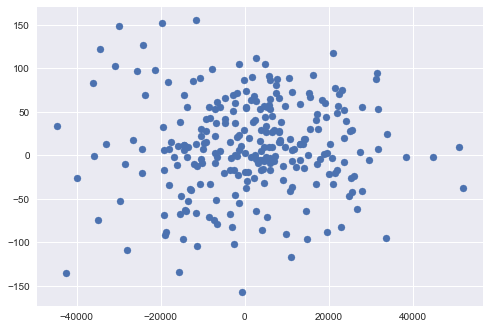

In [306]:
plt.scatter(x=oi1['slope_FII_5'],y=oi1['slope_Close_2'])

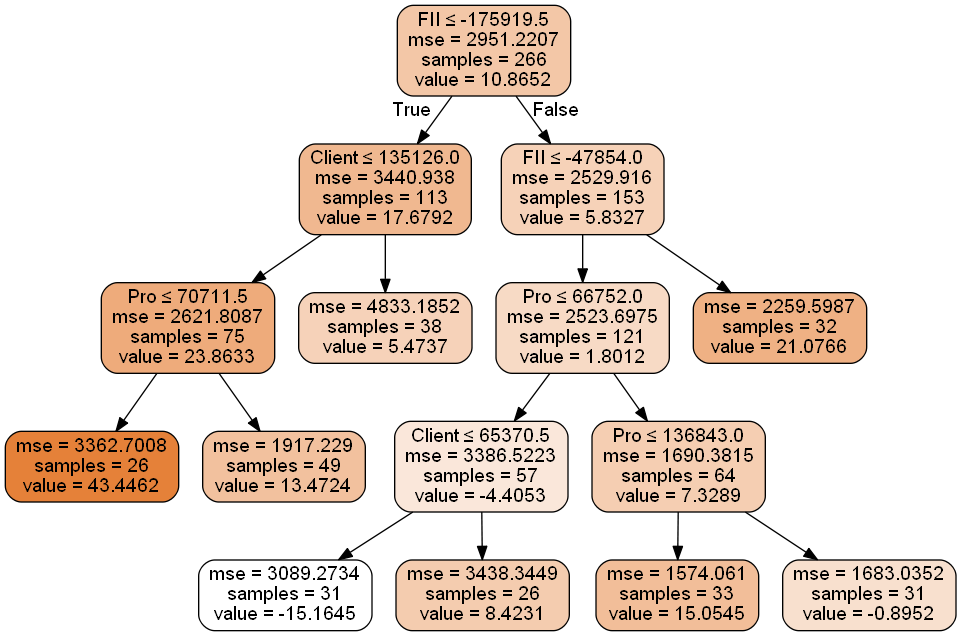

In [251]:

oi2=oi1.dropna()
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=4,min_samples_split=25,min_samples_leaf=25)
dtree.fit(oi2.iloc[:,:3],oi2['NextDay'])

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=oi2.iloc[:,:3].columns.tolist())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [295]:

oi.loc[date(2017,1,17),:]

,Future Index Long,Future Index Short,Future Stock Long,Future Stock Short,Option Index Call Long,Option Index Put Long,Option Index Call Short,Option Index Put Short,Option Stock Call Long,Option Stock Put Long,Option Stock Call Short,Option Stock Put Short,Total Long Contracts,Total Short Contracts,oi_call,oi_put,oi
Client Type,,,,,,,,,,,,,,,,,
Client,141676,192424,709558,241041,460043.0,746254.0,668299.0,798607.0,216480,126394,167716,105541,2400405.0,2173628.0,-208256.0,52353.0,-155903.0
DII,20963,43812,11394,441155,145470.0,10639.0,0.0,0.0,162,0,3,0,188628.0,484970.0,145470.0,-10639.0,134831.0
FII,187280,71285,419022,494070,318271.0,414925.0,218752.0,202266.0,31419,23602,27959,22447,1394519.0,1036779.0,99519.0,-212659.0,-113140.0
Pro,24664,67062,116029,79737,199188.0,177610.0,235921.0,348555.0,42731,32038,95114,54046,592260.0,880435.0,-36733.0,170945.0,134212.0
TOTAL,374583,374583,1256003,1256003,1122972.0,1349428.0,1122972.0,1349428.0,290792,182034,290792,182034,4575812.0,4575812.0,0.0,0.0,0.0
